**Task 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [7]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [8]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [9]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [12]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [13]:
products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [14]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [16]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [18]:
print(merged_data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [19]:
# Group by CustomerID and sum TotalValue to get total spending per customer
customer_spending = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)

# Display top 10 customers
print(customer_spending.head(10))


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [20]:
# Count number of transactions per customer
customer_frequency = merged_data.groupby("CustomerID")["TransactionID"].count().sort_values(ascending=False)

# Display top 10 customers by purchase frequency
print(customer_frequency.head(10))


CustomerID
C0156    11
C0109    11
C0175    10
C0141    10
C0065    10
C0008    10
C0084     9
C0075     9
C0165     9
C0147     9
Name: TransactionID, dtype: int64


<ipython-input-21-40e7803d2d5c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="coolwarm")


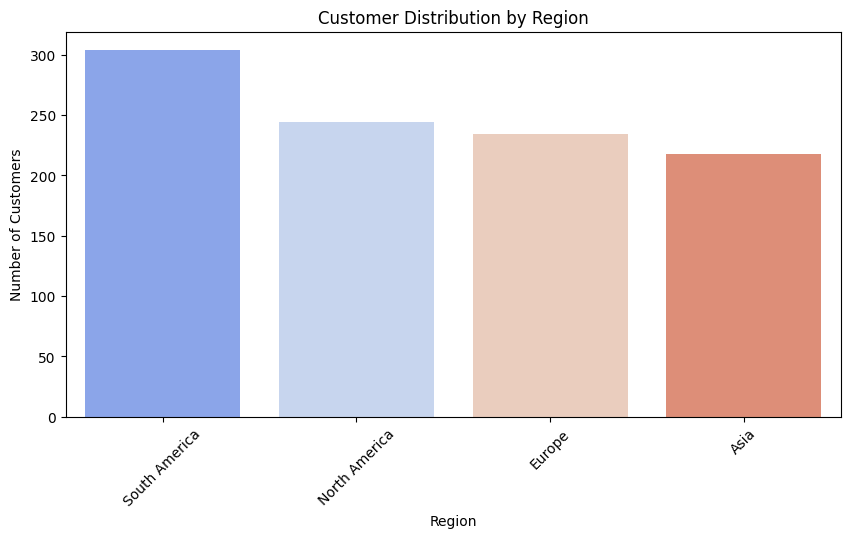

In [21]:
# Count customers per region
region_distribution = merged_data["Region"].value_counts()

# Visualize customer distribution by region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="coolwarm")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


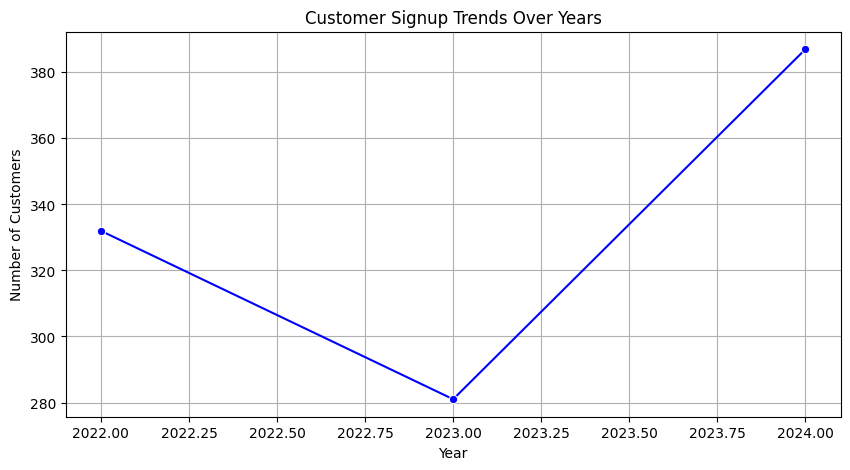

In [22]:
# Convert SignupDate to datetime
merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])

# Extract the year of signup
merged_data["SignupYear"] = merged_data["SignupDate"].dt.year

# Count customers by signup year
signup_trends = merged_data["SignupYear"].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o", color="blue")
plt.title("Customer Signup Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()


CustomerCategory
Low-Value     697
High-Value    303
Name: count, dtype: int64


<ipython-input-23-49c817ee0958>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_data["CustomerCategory"], palette="Set2")


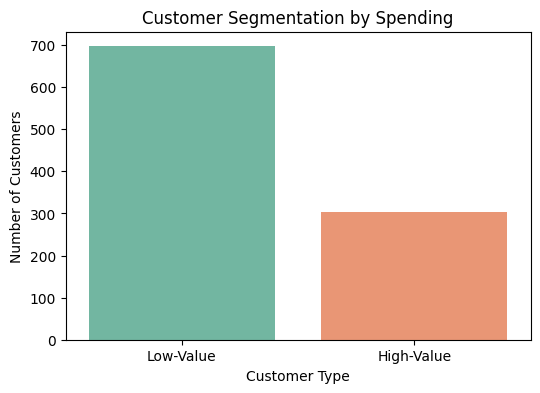

In [23]:
# Define spending thresholds (e.g., top 20% as high-value)
spending_threshold = customer_spending.quantile(0.8)

# Categorize customers
merged_data["CustomerCategory"] = merged_data["CustomerID"].map(
    lambda x: "High-Value" if customer_spending[x] > spending_threshold else "Low-Value"
)

# Count customers in each category
print(merged_data["CustomerCategory"].value_counts())

# Visualize
plt.figure(figsize=(6,4))
sns.countplot(x=merged_data["CustomerCategory"], palette="Set2")
plt.title("Customer Segmentation by Spending")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.show()


In [25]:
# Top-selling products
top_products = merged_data.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_products


,Quantity
ProductID,
P059,46
P054,46
P029,45
P079,43
P061,43
...,...
P044,13
P060,13
P024,12


In [27]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])  # Ensure correct date format
merged_data['Month'] = merged_data['TransactionDate'].dt.month  # Extract month

# Group by Month and sum TotalValue as the revenue measure
sales_trend = merged_data.groupby('Month')['TotalValue'].sum()

# Display sales trend
print(sales_trend)


Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


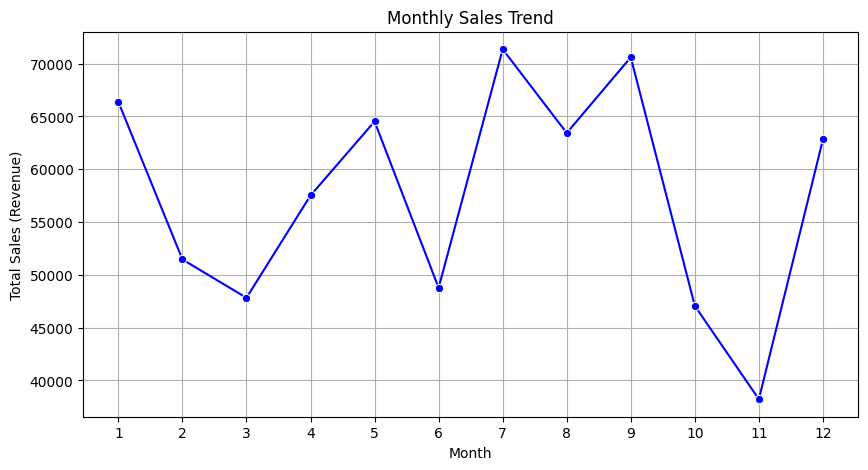

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (Revenue)")
plt.xticks(range(1,13))  # Ensure months are labeled from 1 to 12
plt.grid()
plt.show()


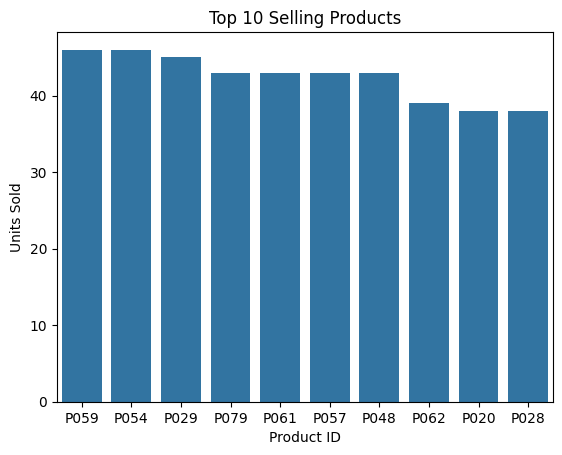

In [29]:
# EDA on Revenue Trends
sns.barplot(x=top_products.index[:10], y=top_products.values[:10])
plt.title("Top 10 Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Units Sold")
plt.show()
